In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets
plt.style.use('seaborn')


In [ ]:
# ! wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv"
# !wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
trainSet = pd.read_csv('/content/gdrive/My Drive/Network Intrusion/Dataset/UNSW_NB15_training-set.csv')
trainSet_original=trainSet
testSet = pd.read_csv('/content/gdrive/My Drive/Network Intrusion/Dataset/UNSW_NB15_testing-set.csv')
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
trainSet.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
testSet.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
from sklearn import preprocessing
# proto_encoder = preprocessing.LabelEncoder()
# service_encoder = preprocessing.LabelEncoder()
# state_encoder = preprocessing.LabelEncoder()
attack_encoder = preprocessing.LabelEncoder()



# proto_encoder.fit(np.array(list(testSet["proto"])+list(trainSet["proto"])))
# service_encoder.fit(np.array(list(testSet["service"])+list(trainSet["service"])))
# state_encoder.fit(np.array(list(testSet["state"])+list(trainSet["state"])))
attack_encoder.fit(np.array(list(testSet["attack_cat"])+list(trainSet["attack_cat"])))



LabelEncoder()

In [ ]:
# new_proto=proto_encoder.transform(trainSet["proto"])
# new_service=service_encoder.transform(trainSet["service"])
# new_state=state_encoder.transform(trainSet["state"])
new_attack=attack_encoder.transform(trainSet["attack_cat"])
for i in range(trainSet.shape[0]):
  # trainSet["proto"][i]=new_proto[i]
  # trainSet["service"][i]=new_service[i]
  # trainSet["state"][i]=new_state[i]
  trainSet["attack_cat"][i]=new_attack[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# new_proto_test=proto_encoder.transform(testSet["proto"])
# new_service_test=service_encoder.transform(testSet["service"])
# new_state_test=state_encoder.transform(testSet["state"])
new_attack_test=attack_encoder.transform(testSet["attack_cat"])
for i in range(testSet.shape[0]):
  # testSet["proto"][i]=new_proto_test[i]
  # testSet["service"][i]=new_service_test[i]
  # testSet["state"][i]=new_state_test[i]
  testSet["attack_cat"][i]=new_attack_test[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
trainSet.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,6,0


In [ ]:
trainSet.tail()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,5,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,8,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,5,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,5,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,16,30,0,0,0,30,30,0,5,1


In [ ]:
to_check_unique_vals=["proto","service","state", "attack_cat"]
for field in to_check_unique_vals:
  print(field,"\n",trainSet[field].unique(),end="\n\n")

proto 
 ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'
 'rd

# Outlier Removal

In [ ]:
# import scipy.stats as stats

In [ ]:
# zs=stats.zscore(trainSet_numerical,axis=1).T
# zs=np.absolute(zs)
# print(zs.shape)
# zs=zs.sum(axis=0)/40

In [ ]:
# outliers=[]
# goodPoints=[]
# for i in range(len(zs)):
#   if zs[i]>0.435:
#     outliers.append(i)
#   else:
#     goodPoints.append(zs[i])
# print("Total: ",len(zs),"\n" ,"Outliers: ",len(outliers))

# Selected features


In [ ]:
trainSet_filter_bin=trainSet[["sttl", "sload", "dload", "swin" ,  "dwin", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm","attack_cat","label"]]
testSet_filter_bin=testSet[["sttl", "sload", "dload", "swin" ,  "dwin", "dmean", "sinpkt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm","attack_cat","label"]]
trainSet_filter_multiclass=trainSet[["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate","attack_cat","label"]]
testSet_filter_multiclass=testSet[["sttl", "dttl", "swin", "dwin", "dmean", "tcprtt", "ct_state_ttl", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "rate","attack_cat","label"]]

In [ ]:
trainSet_wrapper_bin=trainSet[['spkts', 'dpkts', 'sttl', 'dttl', 'sloss', 'swin', 'dwin', 'trans_depth', 'response_body_len', 'ct_state_ttl', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',"attack_cat","label"]]
testSet_wrapper_bin=testSet[['spkts', 'dpkts', 'sttl', 'dttl', 'sloss', 'swin', 'dwin', 'trans_depth', 'response_body_len', 'ct_state_ttl', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',"attack_cat","label"]]
trainSet_wrapper_multiclass=trainSet[['spkts', 'sbytes', 'sttl', 'dttl', 'sloss', 'swin', 'dwin', 'smean', 'trans_depth', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'is_sm_ips_ports',"attack_cat","label"]]
testSet_wrapper_multiclass=testSet[['spkts', 'sbytes', 'sttl', 'dttl', 'sloss', 'swin', 'dwin', 'smean', 'trans_depth', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'is_sm_ips_ports',"attack_cat","label"]]

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


### Binary

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet.drop(["attack_cat","label"],axis=1), trainSet["label"]);

In [ ]:
neigh.score(testSet.drop(["attack_cat","label"],axis=1), testSet["label"])

0.7756157994461449

### Multiclass

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet["attack_cat"].to_numpy(dtype='float'));

In [ ]:
neigh.score(testSet.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), testSet["attack_cat"].to_numpy(dtype='float'))

0.6001068843220133

## Selected Features

### Filter

#### Binary

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1), trainSet_filter_bin["label"]);

In [ ]:
neigh.score(testSet_filter_bin.drop(["attack_cat","label"],axis=1), testSet_filter_bin["label"])

0.8348880143807997

#### Multiclass

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet_filter_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_filter_multiclass["attack_cat"].to_numpy(dtype='float'));

In [ ]:
neigh.score(testSet_filter_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), testSet_filter_multiclass["attack_cat"].to_numpy(dtype='float'))

KeyboardInterrupt: ignored

### Wrapper

#### Binary

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet_wrapper_bin.drop(["attack_cat","label"],axis=1), trainSet_wrapper_bin["label"]);

In [ ]:
neigh.score(testSet_wrapper_bin.drop(["attack_cat","label"],axis=1), testSet_wrapper_bin["label"])

#### Multiclass

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'));

In [ ]:
neigh.score(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))

0.7477408541029005

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

## Binary


In [ ]:
# parameters = {
#     'weights':['uniform', 'distance'],
#     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'n_neighbors' : list(range(1,100)),
#     'n_jobs' : [-1]
#     }

parameters = {
    'weights':['distance'],
    'algorithm':['auto'],
    'n_neighbors' : [21],
    'n_jobs' : [-1]
    }

In [ ]:
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv=20)
clf.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1), trainSet_filter_bin["label"])

GridSearchCV(cv=20, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto'], 'n_jobs': [-1],
                         'n_neighbors': [21], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.80182379]),
 'mean_score_time': array([0.45304811]),
 'mean_test_score': array([0.90371372]),
 'param_algorithm': masked_array(data=['auto'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[-1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[21],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'auto',
   'n_jobs': -1,
   'n_neighbors': 21,
   'weights': 'distance'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.83645073]),
 'split10_test_score': array([0.96019163]),
 'split11_test_score': array([0.97752937]),
 'split12_test_score': array([0.96532451]),
 'split13_test_score': array([0.95916505]),
 'split14

Text(0, 0.5, 'score')

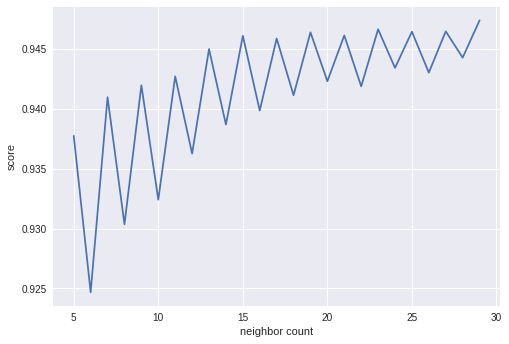

In [ ]:
best_split=[0.93774952, 0.92468918, 0.94097183, 0.93036386, 0.94196989,
        0.93241702, 0.9427113 , 0.93626668, 0.94499259, 0.93869054,
        0.94610471, 0.9398597 , 0.94587658, 0.94114292, 0.94638987,
        0.94231208, 0.94613323, 0.94188434, 0.94664652, 0.9434242 ,
        0.9464469 , 0.94302498, 0.94647542, 0.94427969, 0.94738793]
knearest=list(range(5,30))
plt.plot(knearest,best_split)
plt.xlabel("neighbor count")
plt.ylabel("score")

In [ ]:
clf.score(trainSet_filter_bin.drop(["attack_cat","label"],axis=1), trainSet_filter_bin["label"])

0.9972168517346199

In [ ]:
clf.score(testSet_filter_bin.drop(["attack_cat","label"],axis=1), testSet_filter_bin["label"])

0.8318636739056503

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
from sklearn.metrics import classification_report
y_pred=clf.predict(testSet_filter_bin.drop(["attack_cat","label"],axis=1))



In [ ]:
print(classification_report(testSet_filter_bin["label"], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     37000
           1       0.78      0.96      0.86     45332

    accuracy                           0.83     82332
   macro avg       0.86      0.82      0.82     82332
weighted avg       0.85      0.83      0.83     82332



## Multiclass


In [ ]:
# parameters = {
#     'weights':['uniform', 'distance'],
#     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'n_neighbors' : list(range(1,100)),
#     'n_jobs' : [-1]
#     }

parameters = {
    'weights':['distance'],
    'algorithm':['auto'],
    'n_neighbors' : [16],
    'n_jobs' : [-1]
    }

In [ ]:
neigh = KNeighborsClassifier()
clf2 = GridSearchCV(estimator = neigh, param_grid=parameters, cv=10)
clf2.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'));


In [ ]:
clf2.cv_results_

{'mean_fit_time': array([6.68606]),
 'mean_score_time': array([3.25216029]),
 'mean_test_score': array([0.79167426]),
 'param_algorithm': masked_array(data=['auto'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[-1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[16],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'auto',
   'n_jobs': -1,
   'n_neighbors': 16,
   'weights': 'distance'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.83581409]),
 'split1_test_score': array([0.83916961]),
 'split2_test_score': array([0.82707882]),
 'split3_test_score': array([0.8160146]),
 'split4_test_score': array([0.83010152]),
 'split5_test_sco

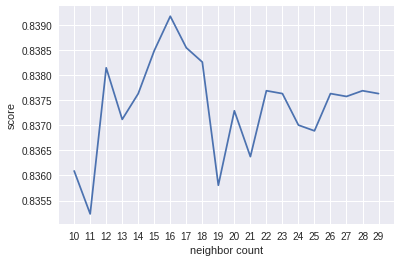

In [ ]:
result=[0.83608988, 0.8352344 , 0.83814304, 0.83711646, 0.83762975,
        0.83848523, 0.83916961, 0.83854226, 0.8382571 , 0.83580472,
        0.83728756, 0.83637504, 0.83768678, 0.83762975, 0.8370024 ,
        0.83688833, 0.83762975, 0.83757272, 0.83768678, 0.83762975]
neighbors=list(range(10,30))
plt.xticks(range(10, 30))
plt.plot(neighbors,result)
plt.xlabel("neighbor count")
plt.ylabel("score")
plt.show()

In [ ]:
trainSet_wrapper_multiclass["attack_cat"].unique()

array([6, 1, 0, 4, 8, 7, 3, 2, 9, 5], dtype=object)

In [ ]:
clf2.score(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))

0.8360623014583013

In [ ]:
clf2.score(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))


0.756753145799932

In [ ]:
from sklearn.metrics import classification_report
y_pred2=clf2.predict(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1))

In [ ]:
print(classification_report(testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'), y_pred2, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.16      0.06      0.09       583
           2       0.33      0.43      0.37      4089
           3       0.58      0.75      0.65     11132
           4       0.32      0.57      0.41      6062
           5       1.00      0.97      0.98     18871
           6       0.94      0.74      0.83     37000
           7       0.91      0.79      0.85      3496
           8       0.32      0.78      0.45       378
           9       0.64      0.77      0.70        44

    accuracy                           0.76     82332
   macro avg       0.52      0.59      0.53     82332
weighted avg       0.81      0.76      0.77     82332



# Grid Search(with scaling)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
minscaler = MinMaxScaler()
stdscaler = StandardScaler()

## Binary


In [ ]:
parameters = {
    'weights':['distance'],
    'algorithm':['auto'],
    'n_neighbors' : [21],
    'n_jobs' : [-1]
    }
neigh = KNeighborsClassifier(weights='distance', algorithm='auto', n_neighbors=21)
# clf = GridSearchCV(neigh, parameters, cv=20)
clf = neigh

stdscaler.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1))
# minscaler.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# myX=minscaler.transform(trainSet_filter_bin.drop(["attack_cat","label"],axis=1))
# myOtherX=minscaler.transform(testSet_filter_bin.drop(["attack_cat","label"],axis=1))
myX=stdscaler.transform(trainSet_filter_bin.drop(["attack_cat","label"],axis=1))
myOtherX=stdscaler.transform(testSet_filter_bin.drop(["attack_cat","label"],axis=1))

In [ ]:
# clf.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1), trainSet_filter_bin["label"])
clf.fit(myX, trainSet_filter_bin["label"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='distance')

{'mean_fit_time': array([0.80182379]),
 'mean_score_time': array([0.45304811]),
 'mean_test_score': array([0.90371372]),
 'param_algorithm': masked_array(data=['auto'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[-1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[21],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'auto',
   'n_jobs': -1,
   'n_neighbors': 21,
   'weights': 'distance'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.83645073]),
 'split10_test_score': array([0.96019163]),
 'split11_test_score': array([0.97752937]),
 'split12_test_score': array([0.96532451]),
 'split13_test_score': array([0.95916505]),
 'split14

Text(0, 0.5, 'score')

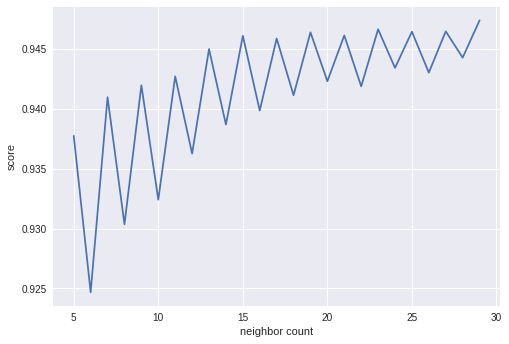

In [ ]:
best_split=[0.93774952, 0.92468918, 0.94097183, 0.93036386, 0.94196989,
        0.93241702, 0.9427113 , 0.93626668, 0.94499259, 0.93869054,
        0.94610471, 0.9398597 , 0.94587658, 0.94114292, 0.94638987,
        0.94231208, 0.94613323, 0.94188434, 0.94664652, 0.9434242 ,
        0.9464469 , 0.94302498, 0.94647542, 0.94427969, 0.94738793]
knearest=list(range(5,30))
plt.plot(knearest,best_split)
plt.xlabel("neighbor count")
plt.ylabel("score")

In [ ]:
clf.score(myX, trainSet_filter_bin["label"])

0.9979354514916648

In [ ]:
clf.score(myOtherX, testSet_filter_bin["label"])

0.8404994412864986

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
from sklearn.metrics import classification_report
y_pred=clf.predict(testSet_filter_bin.drop(["attack_cat","label"],axis=1))



In [ ]:
print(classification_report(testSet_filter_bin["label"], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     37000
           1       0.78      0.96      0.86     45332

    accuracy                           0.83     82332
   macro avg       0.86      0.82      0.82     82332
weighted avg       0.85      0.83      0.83     82332



## Multiclass


In [ ]:
# parameters = {
#     'weights':['uniform', 'distance'],
#     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'n_neighbors' : list(range(1,100)),
#     'n_jobs' : [-1]
#     }

parameters = {
    'weights':['distance'],
    'algorithm':['auto'],
    'n_neighbors' : [16],
    'n_jobs' : [-1]
    }

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
minscaler = MinMaxScaler()
stdmulscaler = StandardScaler()
robscaler =  RobustScaler()

In [ ]:
# stdmulscaler.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
# mymulX=stdmulscaler.transform(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
# mymulOtherX=stdmulscaler.transform(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))

# minscaler.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
# mymulX=minscaler.transform(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
# mymulOtherX=minscaler.transform(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))

robscaler.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
mymulX=robscaler.transform(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))
mymulOtherX=robscaler.transform(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'))

In [ ]:
neigh2 = KNeighborsClassifier(weights='distance', n_neighbors=16)
# clf2 = GridSearchCV(estimator = neigh, param_grid=parameters, cv=10)
clf2 = neigh2
# clf2.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'));
clf2.fit(mymulX, trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'));


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

# # Instantiate the clustering model and visualizer
# model = KMeans(10)
# visualizer = InterclusterDistance(model)

# visualizer.fit(mymulX)        # Fit the data to the visualizer
# visualizer.show()  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e1eeee710>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

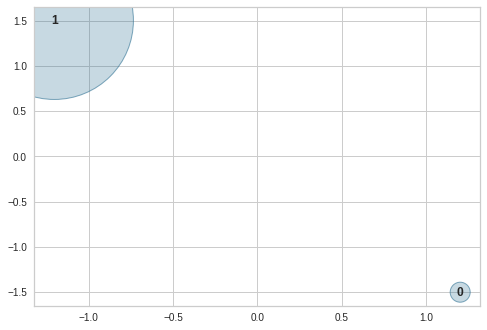

In [ ]:
# standard scaler
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(mymulX)    

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e1ea25278>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

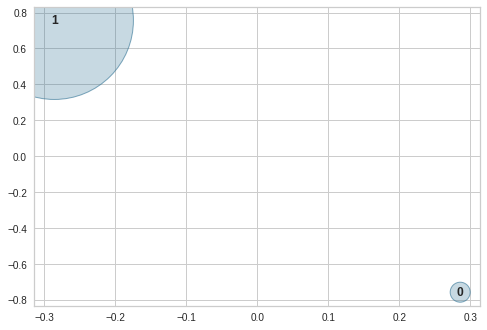

In [ ]:
# robust scaler
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(mymulX)    

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e1e923278>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

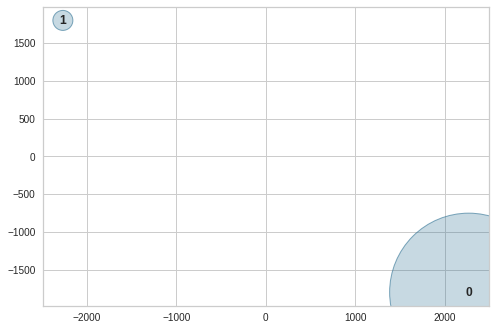

In [ ]:
# minmax scaler
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(mymulX)    

In [ ]:
np.unique(trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
clf2.score(mymulX, trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))

0.8401058508848472

In [ ]:
clf2.score(mymulOtherX, testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))


0.7661662537045134

In [ ]:
# from mlxtend.plotting import plot_decision_regions
# # clf = neighbors.KNeighborsClassifier(n_neighbors=k)
# # clf.fit(x, y)# Plotting decision region
# plot_decision_regions(mymulX, trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'), clf=clf2, legend=2)# Adding axes annotations
# # plt.xlabel(‘X’)
# # plt.ylabel(‘Y’)
# # plt.title(‘Knn with K=’+ str(k))
# plt.show()

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
y_pred2=clf2.predict(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1))

In [ ]:
  print(classification_report(testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'), y_pred2, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.16      0.06      0.09       583
           2       0.33      0.43      0.37      4089
           3       0.58      0.75      0.65     11132
           4       0.32      0.57      0.41      6062
           5       1.00      0.97      0.98     18871
           6       0.94      0.74      0.83     37000
           7       0.91      0.79      0.85      3496
           8       0.32      0.78      0.45       378
           9       0.64      0.77      0.70        44

    accuracy                           0.76     82332
   macro avg       0.52      0.59      0.53     82332
weighted avg       0.81      0.76      0.77     82332



# Easy Ensemble

## Single

In [ ]:
# parameters = {
#     'weights':['distance'],
#     'algorithm':['auto'],
#     'n_neighbors' : [21],
#     # 'n_jobs' : [-1]
#     }

singleNeigh = KNeighborsClassifier(algorithm='auto',n_neighbors=21,n_jobs=-1)

In [ ]:
# singleNeigh.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1).to_numpy(), trainSet_filter_bin["label"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
# singleNeigh.score(testSet_filter_bin.drop(["attack_cat","label"],axis=1), testSet_filter_bin["label"])

0.8224384200553855

In [ ]:
from imblearn.ensemble import RUSBoostClassifier

In [ ]:
model = RUSBoostClassifier(base_estimator=singleNeigh)

In [ ]:
model.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1).to_numpy(), trainSet_filter_bin["label"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier 
eec = EasyEnsembleClassifier(base_estimator=singleNeigh,random_state=80)
eec.fit(trainSet_filter_bin.drop(["attack_cat","label"],axis=1).to_numpy(), trainSet_filter_bin["label"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

EasyEnsembleClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=-1,
                                                           n_neighbors=21, p=2,
                                                           weights='uniform'),
                       n_estimators=10, n_jobs=1, random_state=80,
                       replacement=False, sampling_strategy='auto', verbose=0,
                       warm_start=False)

In [ ]:
eec.score(testSet_filter_bin.drop(["attack_cat","label"],axis=1), testSet_filter_bin["label"])

0.8388961764562989

## Multiclass

In [ ]:

multiNeigh = KNeighborsClassifier(algorithm='auto',n_neighbors=16,n_jobs=-1)

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier 
eemulti = EasyEnsembleClassifier(base_estimator=multiNeigh,replacement=True,n_estimators=10)
eemulti.fit(trainSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), trainSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'));

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
eemulti.score(testSet_wrapper_multiclass.drop(["attack_cat","label"],axis=1).to_numpy(dtype='float'), testSet_wrapper_multiclass["attack_cat"].to_numpy(dtype='float'))


0.538502647816159